In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image Preprocessing - Histogram Equalization

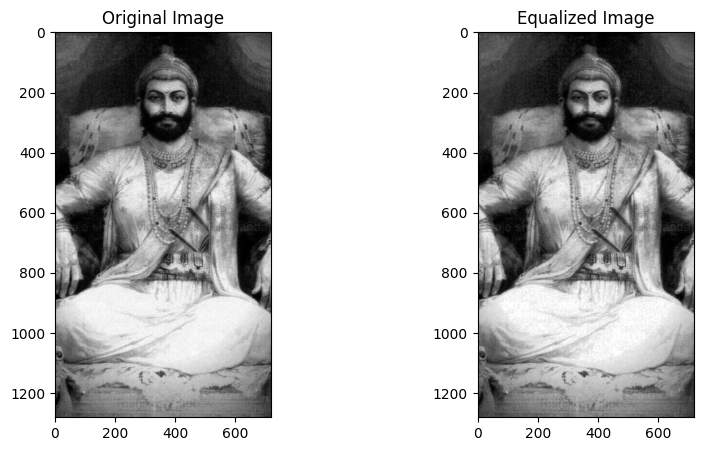

In [3]:

image = cv2.imread('C:/Semester4/digital_image_processing/dip_project/result_images/Restored_shivaji.jpg', cv2.IMREAD_GRAYSCALE)


equalized_image = cv2.equalizeHist(image)

cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/histogram_equalized_new_image.jpg", equalized_image)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')
plt.show()


Spatial Domain Filter to remove impulse noise (Median Filter)

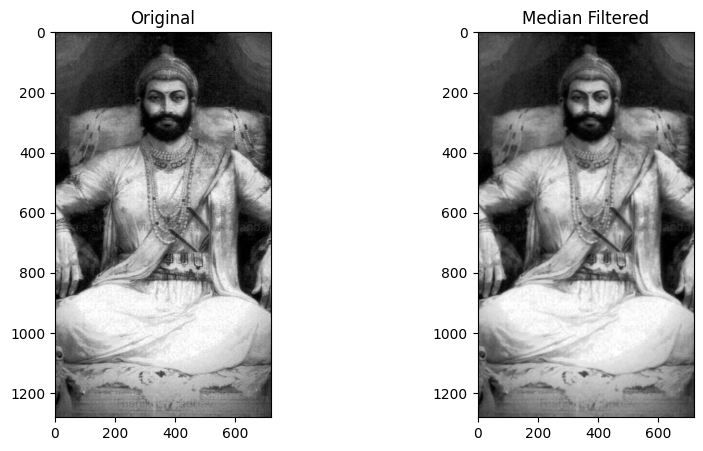

In [4]:
median_filtered = cv2.medianBlur(equalized_image, 5)  # Adjust the kernel size as needed


cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/median_filtered_new_image.jpg", median_filtered)



plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(equalized_image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filtered')
plt.show()


Denoising with Non-Local Means

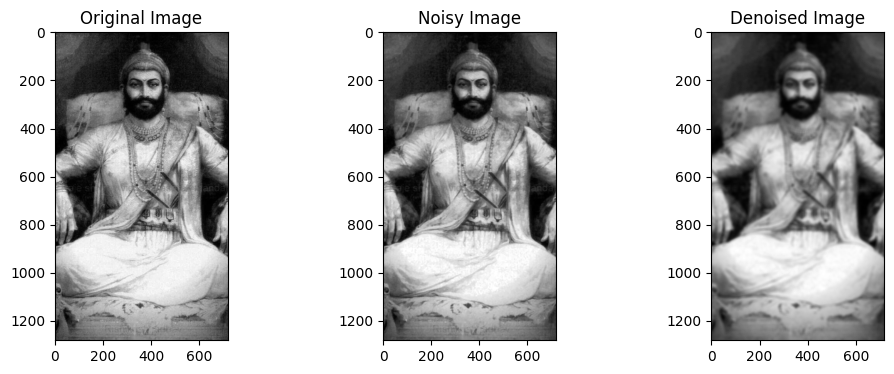

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means
import cv2

denoised_image = denoise_nl_means(median_filtered, h=0.8, patch_size=5, patch_distance=6)

# Save the denoised image using OpenCV
cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/nonlocal_denoised_new_image.jpg", denoised_image)

# Display the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()


smoothing image with gaussian blur

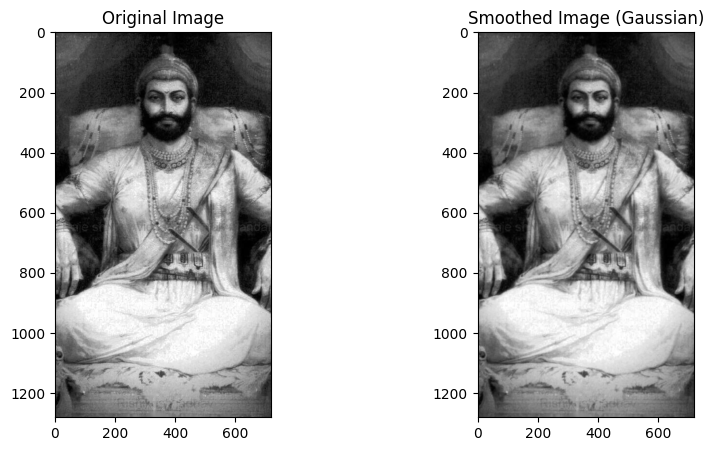

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



smoothed_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)


cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/smoothed_gaussian_blur_new_image.jpg", smoothed_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(equalized_image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(smoothed_image, cmap='gray'), plt.title('Smoothed Image (Gaussian)')
plt.show()


Apply bilateral filtering and then sharpening the image

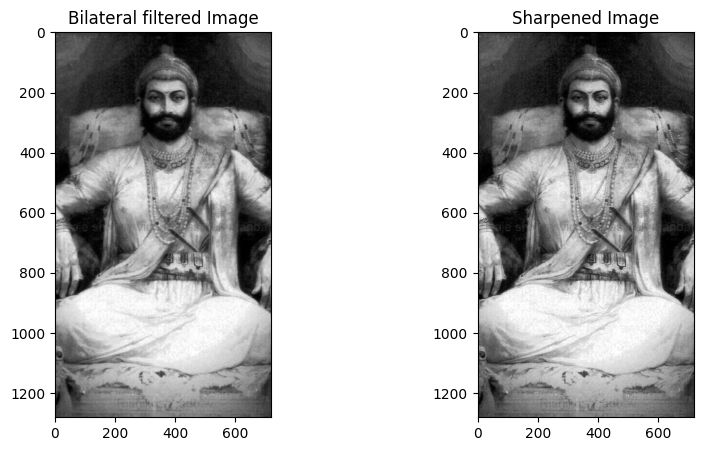

In [25]:


# Apply bilateral filter to remove noise
bilateral_filtered_img = cv2.bilateralFilter(equalized_image, 4, 20, 20)

# Apply sharpening filter to enhance details
sharpened_img = cv2.filter2D(bilateral_filtered_img, -1, kernel=np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]))


cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/bilateral_filter_new_image.jpg", bilateral_filtered_img)


cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/laplace_sharpened_new_image.jpg", sharpened_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow( bilateral_filtered_img, cmap='gray'), plt.title('Bilateral filtered Image')
plt.subplot(1, 2, 2), plt.imshow(sharpened_img, cmap='gray'), plt.title('Sharpened Image')
plt.show()

sharpening image with unsharp Masking

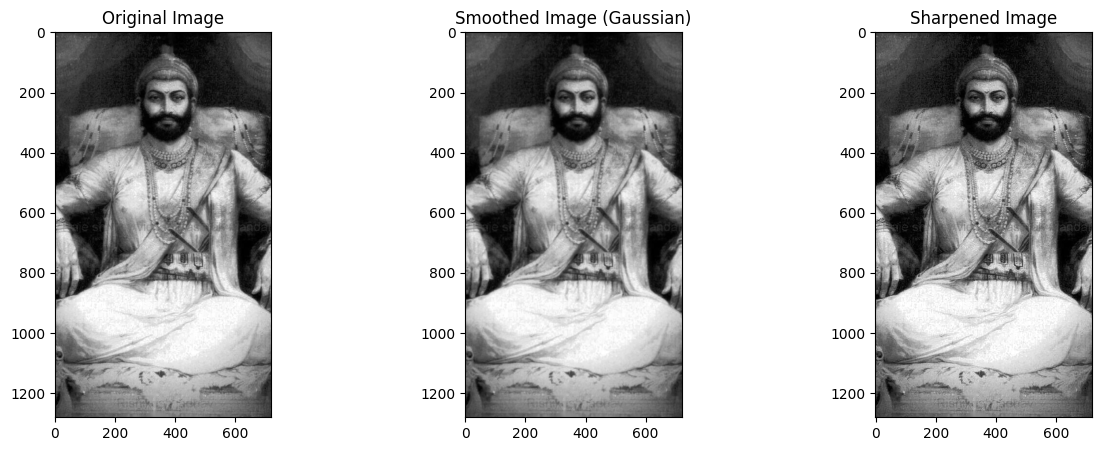

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


alpha = 1.4  

sharpened_image = cv2.addWeighted(equalized_image, 1 + alpha, smoothed_image, -alpha, 0)


cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/sharp_unmask_new_image.jpg", sharpened_image)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(equalized_image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(smoothed_image, cmap='gray'), plt.title('Smoothed Image (Gaussian)')
plt.subplot(1, 3, 3), plt.imshow(sharpened_image, cmap='gray'), plt.title('Sharpened Image')

plt.show()


Resolution enhancement with Bicubic and Bilinear Interpolation

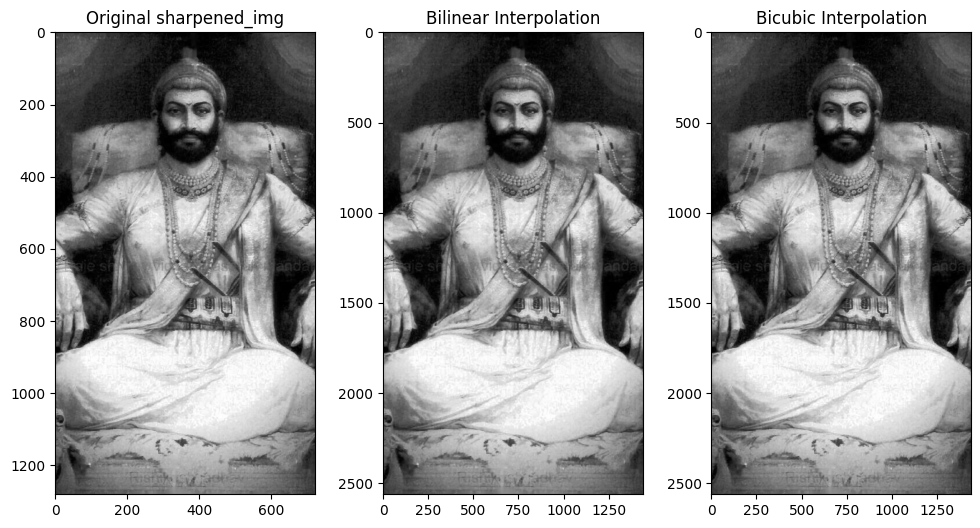

In [28]:


# Bilinear interpolation
height, width = 2 * sharpened_img.shape[0], 2 * sharpened_img.shape[1]
resized_bilinear = cv2.resize(sharpened_img, (width, height), interpolation=cv2.INTER_LINEAR)

# Bicubic interpolation
resized_bicubic = cv2.resize(sharpened_img, (width, height), interpolation=cv2.INTER_CUBIC)



cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/bicunic_resolution_new_image.jpg", resized_bicubic)



cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/bilinear_resolution_new_image.jpg", resized_bilinear)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
plt.title('Original sharpened_img')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(resized_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Bilinear Interpolation')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(resized_bicubic, cv2.COLOR_BGR2RGB))
plt.title('Bicubic Interpolation')

plt.show()
